# Advertising Dataset

## 1. Load the given dataset and explore its columns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load dataset
data = pd.read_csv("advertising.csv")

# View basic information
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 2. Split the Data into Training and Testing Sets

In [3]:
X = data[["TV"]]     
y = data["Sales"]    

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 3. Build and Train the Linear Regression Model

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Slope (m): 0.05548294393146319
Intercept (c): 7.00710842824185


## 4. Predict Sales on Test Data

In [5]:
y_pred = model.predict(X_test)

tv_spend = np.array([[150]])
predicted_sales = model.predict(tv_spend)

print("Predicted Sales for TV spend of 150 units:", predicted_sales[0])

Predicted Sales for TV spend of 150 units: 15.329550017961328


/Users/santhoshib/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 5. Measure Model Accuracy

In [6]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.101072906773963


In [7]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.802561303423698


## 6. Visualization: Data Points and Best-Fit Line

/Users/santhoshib/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


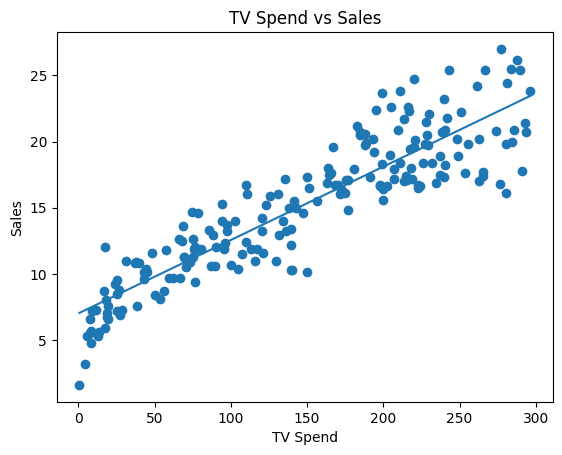

In [9]:
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

plt.figure()
plt.scatter(X, y)          
plt.plot(X_line, y_line)   
plt.xlabel("TV Spend")
plt.ylabel("Sales")
plt.title("TV Spend vs Sales")
plt.show()

### Does higher TV spend increase sales?

Yes.
The regression line has a positive slope, indicating that increasing TV advertising spend leads to higher sales.

### Is the prediction error acceptable?

1. A high R² score indicates that TV advertising explains a significant portion of sales variation.
	
2. The MSE is relatively low, meaning prediction errors are within an acceptable business range.

For decision-making and budget planning, this model is reasonably reliable.

### Suggest One Improvement

Use multiple linear regression by including:

1. Radio advertising spend

2. Newspaper advertising spend

This will:

Capture combined marketing effects

Improve prediction accuracy

Provide better ROI insights for management

# ____________________________________________________________________________________________________________________

## Multiple Linear Regression

### 1. Load the dataset and examine the available columns.
### 2. Use TV, Radio, and Newspaper advertising spends as input features.
### 3. Use Sales as the target variable.

In [13]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
X = data[["TV", "Radio", "Newspaper"]]  # Input features
y = data["Sales"]                       # Target variable

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4. Build a model that learns the relationship between advertising spends and sales.
### 5. Train the model using historical data.
### 6. Predict sales for unseen data points.


In [8]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients

print("Intercept:", model.intercept_)

Intercept: 4.714126402214129


In [9]:
y_pred = model.predict(X_test)

### 7. Predict sales when the advertising budget is:
TV = 150
Radio = 20
Newspaper = 30

In [10]:
new_budget = np.array([[150, 20, 30]])
predicted_sales = model.predict(new_budget)

print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 15.039523680317233


/Users/santhoshib/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 8. Evaluate the model’s prediction error.

In [11]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Squared Error: 2.907756910271091
R² Score: 0.9059011844150826


### 9. Visualize:
Actual sales vs predicted sales

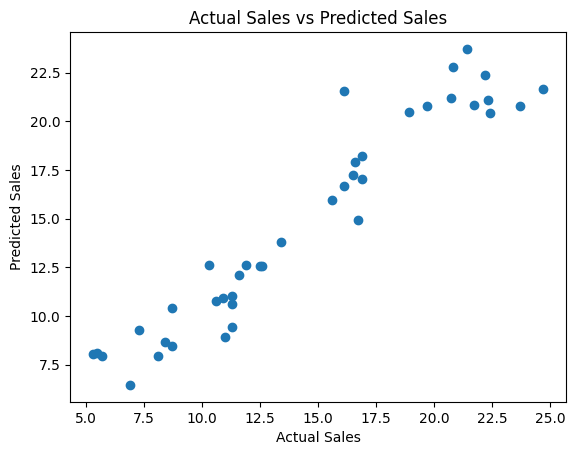

In [12]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.show()